In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

ini_data = pd.ExcelFile('FinRatios_NormData_FIN.xlsx')
data = ini_data.parse('post1_исправ качеств')
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
logit_model=sm.MNLogit(y_train,sm.add_constant(X_train))
logit_model
result=logit_model.fit()
stats=result.summary()
print(stats)

Optimization terminated successfully.
         Current function value: 0.354568
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                 target   No. Observations:                  708
Model:                        MNLogit   Df Residuals:                      697
Method:                           MLE   Df Model:                           10
Date:                Sat, 08 May 2021   Pseudo R-squ.:                  0.4299
Time:                        11:35:37   Log-Likelihood:                -251.03
converged:                       True   LL-Null:                       -440.32
Covariance Type:            nonrobust   LLR p-value:                 3.407e-75
  target=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8166      0.289      6.277      0.000       1.249       2.384
GPM           -0.3555      0.

In [2]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, preds)))
print('Error rate: {:.2f}'.format(1 - accuracy_score(y_test, preds)))

Accuracy: 0.84
Error rate: 0.16


In [3]:
# кросс-валидация
from sklearn.model_selection import cross_val_score
#clf = LogisticRegression(solver='newton-cg', multi_class='multinomial')
scores = cross_val_score(model1, X_train, y_train, cv=5)
scores

array([0.78873239, 0.8028169 , 0.88028169, 0.82269504, 0.85815603])

In [4]:
# матрица ошибок
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds)
print(confusion_matrix)

[[104  15]
 [ 14  44]]


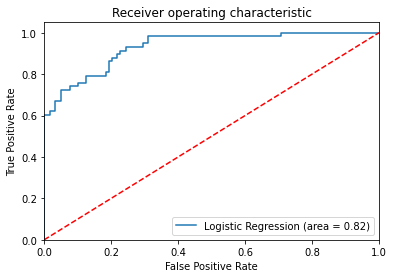

In [5]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
logit_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [8]:
from sklearn import metrics
print (metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       119
           1       0.75      0.76      0.75        58

    accuracy                           0.84       177
   macro avg       0.81      0.82      0.81       177
weighted avg       0.84      0.84      0.84       177

